In [31]:
import pandas as pd

weather = pd.read_csv("Delhi_weather.csv",index_col="DATE")

In [32]:
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snwd,tavg,tmax,tmin
DATE,,,,,,,
1970-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",NaN,NaN,51.0,69.0,38.0
2024-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",NaN,NaN,49.0,67.0,38.0
2024-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",NaN,NaN,52.0,63.0,42.0


In [33]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

station    0.000000
name       0.000000
prcp       0.425550
snwd       0.999894
tavg       0.019348
tmax       0.122767
tmin       0.183886
dtype: float64

In [34]:
valid_columns = weather.columns[null_pct< .5]

In [35]:
valid_columns

Index(['station', 'name', 'prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [36]:
weather = weather.ffill()
weather

,station,name,prcp,snwd,tavg,tmax,tmin
DATE,,,,,,,
1970-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
1970-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,51.0,69.0,38.0
2024-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,49.0,67.0,38.0
2024-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,52.0,63.0,42.0


In [37]:
weather.apply(pd.isnull).sum()

station      0
name         0
prcp         0
snwd       431
tavg       365
tmax       370
tmin       369
dtype: int64

In [38]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
snwd       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [39]:
weather.dtypes

station     object
name        object
prcp       float64
snwd       float64
tavg       float64
tmax       float64
tmin       float64
dtype: object

In [40]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14',
       '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19'],
      dtype='object', name='DATE', length=18865)

In [41]:
weather.index = pd.to_datetime(weather.index)

In [42]:
weather.index.year.value_counts().sort_index()

1970    365
1973    359
1974    363
1975    364
1976    359
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    364
1985    365
1986    365
1987    364
1988    359
1989    363
1990    349
1991    356
1992    311
1993    363
1994    361
1995    364
1996    366
1997    365
1998    363
1999    362
2000    366
2001    364
2002    364
2003    365
2004    366
2005    365
2006    365
2007    362
2008    366
2009    365
2010    361
2011    360
2012    366
2013    365
2014    365
2015    365
2016    365
2017    363
2018    365
2019    361
2020    366
2021    362
2022    365
2023    363
2024     19
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

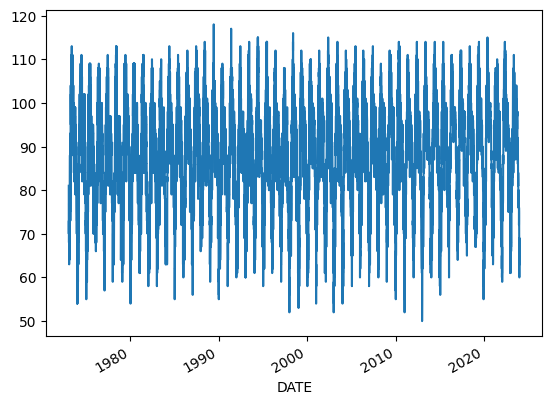

In [43]:
weather["tmax"].plot()

In [44]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snwd,tavg,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN,NaN
1970-01-02,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN,NaN
1970-01-03,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN,NaN
1970-01-04,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN,NaN
1970-01-05,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,51.0,69.0,38.0,67.0
2024-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,49.0,67.0,38.0,63.0
2024-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,52.0,63.0,42.0,65.0


In [56]:
weather = weather.ffill()
weather = weather.dropna()
weather

,station,name,prcp,snwd,tavg,tmax,tmin,target
DATE,,,,,,,,
1973-03-11,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,5.1,66.0,75.0,59.0,73.0
1973-03-12,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,5.1,62.0,73.0,50.0,75.0
1973-03-13,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,5.1,63.0,75.0,48.0,77.0
1973-03-14,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,5.1,65.0,77.0,50.0,82.0
1973-03-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,5.1,69.0,82.0,52.0,88.0
...,...,...,...,...,...,...,...,...
2024-01-15,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,51.0,69.0,38.0,67.0
2024-01-16,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,49.0,67.0,38.0,63.0
2024-01-17,IN022021900,"NEW DELHI SAFDARJUN, IN",0.0,8.7,52.0,63.0,42.0,65.0


In [57]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [58]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [59]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [60]:
predictions = backtest(weather, rr, predictors)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.2906844599751475

In [62]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1997-06-18,82.0,103.261716,21.261716
1993-06-23,81.0,100.927323,19.927323
2000-12-31,57.0,76.504505,19.504505
1988-03-07,72.0,91.199629,19.199629
2015-02-28,66.0,84.920135,18.920135
...,...,...,...
1991-01-20,71.0,71.000331,0.000331
2022-02-24,81.0,80.999671,0.000329
2004-10-31,83.0,82.999711,0.000289


In [63]:
pd.Series(rr.coef_, index=predictors)

prcp    0.301305
snwd    0.089906
tavg    0.458342
tmax    0.630868
tmin   -0.142615
dtype: float64

In [64]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [65]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [66]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [67]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [68]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.245723167545981

In [69]:
mean_squared_error(predictions["actual"], predictions["prediction"])

9.810000450286603

In [70]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1997-06-18,82.0,103.089195,21.089195
1993-06-23,81.0,101.453078,20.453078
1996-06-08,86.0,105.036028,19.036028
2006-06-01,89.0,107.039043,18.039043
1983-04-11,72.0,90.038405,18.038405
...,...,...,...
2019-07-22,98.0,98.000589,0.000589
1992-10-28,87.0,87.000565,0.000565
1995-12-22,71.0,71.000387,0.000387


,actual,prediction,diff
DATE,,,
1983-04-05,89.0,88.560712,0.439288
1983-04-06,92.0,89.813071,2.186929
1983-04-07,89.0,92.294976,3.294976
1983-04-08,91.0,89.784220,1.215780
1983-04-09,86.0,90.269803,4.269803
...,...,...,...
2024-01-15,67.0,68.393896,1.393896
2024-01-16,63.0,66.632816,3.632816
2024-01-17,65.0,65.202335,0.202335


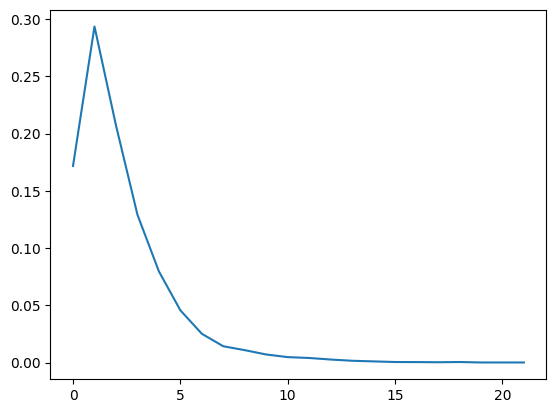

In [71]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
predictions